In [ ]:
# CLUSTERING --- MALL CUSTOMERS SEGMENTATION
# X

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd 
from sklearn import datasets, neighbors
import matplotlib.pyplot as plt
from ipywidgets import interactive
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn import preprocessing

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics


In [ ]:
# importing the dataset

df = pd.read_csv("/content/drive/MyDrive/NIIT MINI PROJECTS/DS3_C6_S3_MallCustomers_Data_Project.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
# shape of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


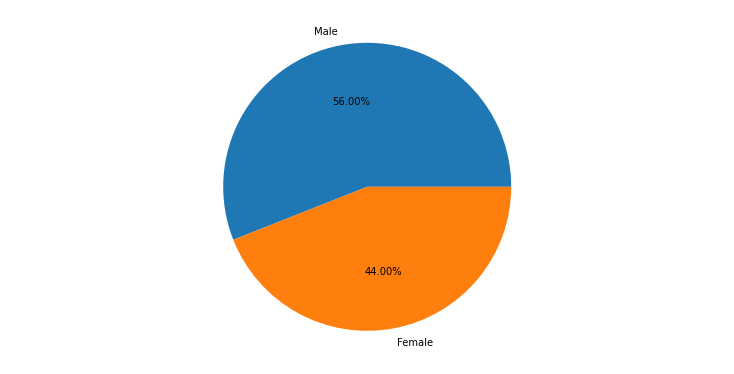

In [ ]:
# CUSTOMERS FROM DIFFERENT GENDER GROUP

fig = plt.figure(figsize =(10,5))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

ax.pie(df.Gender.value_counts(),labels = df.Gender.unique(), autopct='%1.2f%%')
plt.show()

In [ ]:
# Sincce the customer ID has unique values, so dropping this columns

df.drop(['CustomerID','Gender'], axis = 1 , inplace= True)

In [ ]:
'''#Using Label Encoder to convert categorical column into numeric one

label_encoder = preprocessing.LabelEncoder()

df['Gender']= label_encoder.fit_transform(df['Gender'])'''

"#Using Label Encoder to convert categorical column into numeric one\n\nlabel_encoder = preprocessing.LabelEncoder()\n\ndf['Gender']= label_encoder.fit_transform(df['Gender'])"

In [ ]:
df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [ ]:
# CHECKING THE RANGE OF DATA: FOR DETERMINING WHETHER TO SCALE DATA OR NOT
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [ ]:
# SCALING THE DATA SET WITH STANDARD SCALER

X = pd.DataFrame(MinMaxScaler().fit_transform(df.to_numpy()),columns=df.columns)
X

,Age,Annual Income (k$),Spending Score (1-100)
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959
...,...,...,...
195,0.326923,0.860656,0.795918
196,0.519231,0.909836,0.275510
197,0.269231,0.909836,0.744898
198,0.269231,1.000000,0.173469


### VISUAL INSPECTION OF DATA

In [ ]:
plt.scatter(X['Age'], X['Annual Income (k$)'], marker='.', c='orange')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Scatter plot for Age and Annual Income')

KeyError: ignored

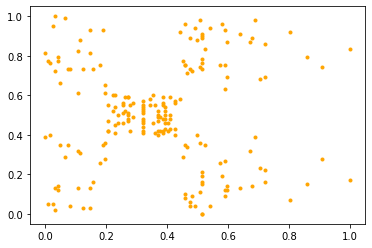

In [ ]:
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], marker='.', c='orange')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter plot for Annual Income and Spending Score (1-100)')

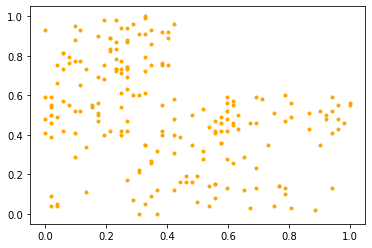

In [ ]:
plt.scatter(X['Age'], X['Spending Score (1-100)'], marker='.', c='orange')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter plot for Age and Spending Score (1-100)');

From above three scatters plot, we can visualize that Age feature is not able to form a good cluster with two other features. So, we are dropping this for  model building.

In [ ]:
X = X.iloc[:, [1,2]]

### **Now**, data is ready for fitting the Model.
We are going to use following three clustering algorithm:
1.  K-Means Clustering
2.  Hierarchical Clustering
3.  DBSCAN Clustering

### Model 1: K-Means Clustering

#### Finding the optimum value of K(number of clusters) using Elbow curve Method

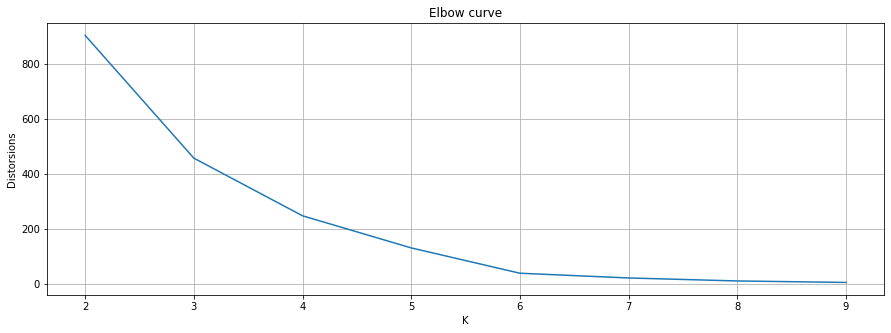

In [ ]:
distorsions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)   #  FITTING THE DATA SET
    distorsions.append(kmeans.inertia_)  # Inertia measures how well a dataset was clustered by K-Means

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distorsions)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve');

###### From the above figure we can see that the kink/elbow is at point k equal to 4 and 6. So, we are building the model with 5 clusters as there is no much decrease in the distortion after 5 k value.

### Finding the optimum value of K and cluster efficiency using Silhouette Score


Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

For n_clusters = 2 The average silhouette_score is : 0.5357092099702268
For n_clusters = 3 The average silhouette_score is : 0.6483279528472758
For n_clusters = 4 The average silhouette_score is : 0.7293539513749221
For n_clusters = 5 The average silhouette_score is : 0.8344909332819881
For n_clusters = 6 The average silhouette_score is : 0.8935968417981716
For n_clusters = 7 The average silhouette_score is : 0.9095313770511524
For n_clusters = 8 The average silhouette_score is : 0.9175543893338621
For n_clusters = 9 The average silhouette_score is : 0.9329132734154064
For n_clusters = 10 The average silhouette_score is : 0.9347419172076505


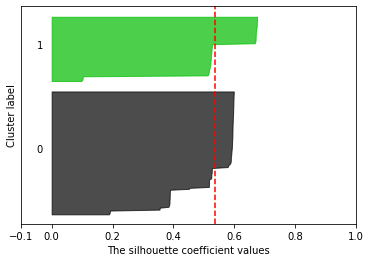

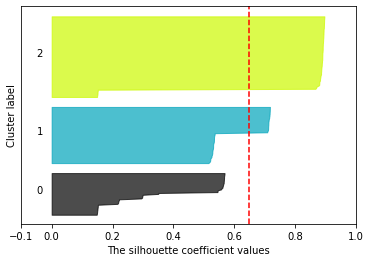

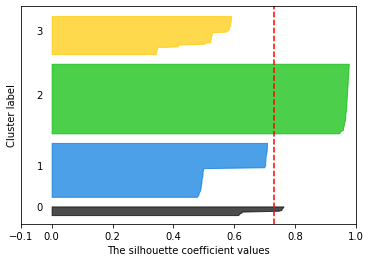

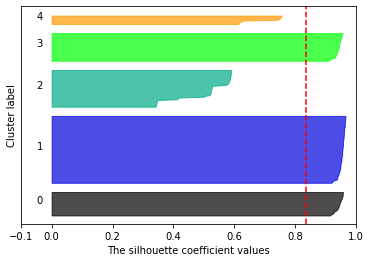

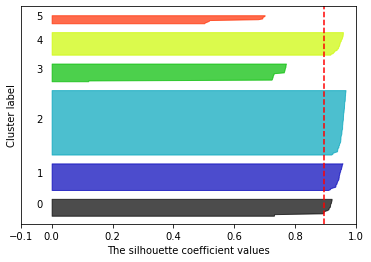

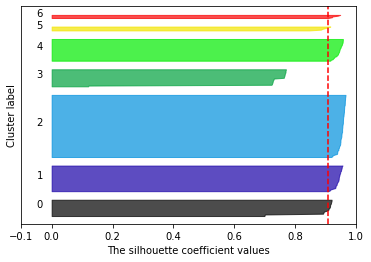

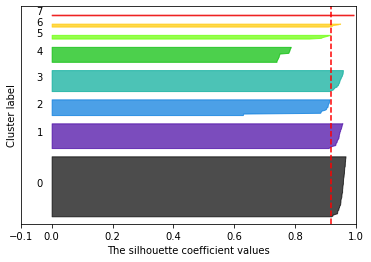

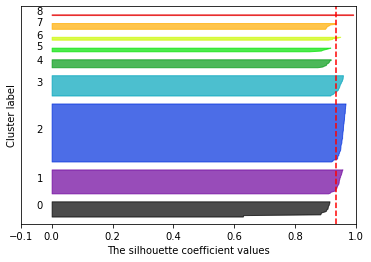

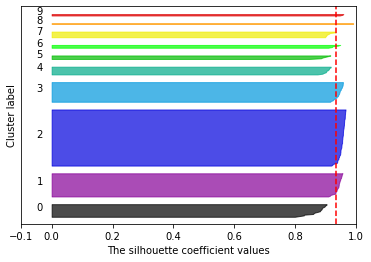

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6, 7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()


We find from both the metrics that K=5 is the optimum value.

In [ ]:
# BUILDING THE MODEL WITH 5 CLUSTERS

Kmeans = KMeans(n_clusters=5)
Kmeans.fit(X)

KMeans(n_clusters=5)

Extracting features of the model

In [ ]:
# FINDING THE CENTROIDS

cluster_centroid = Kmeans.cluster_centers_
cluster_centroid

array([[ 3.30297511e-01,  4.95086924e-01,  3.00000000e+00,
         2.00000000e+00,  2.00000000e+00,  3.00000000e+00],
       [ 9.03460838e-02,  4.94784580e-01,  1.00000000e+00,
         3.51111111e+00,  4.88888889e-01,  5.55555556e-01],
       [ 5.46287367e-01,  8.32232893e-01, -4.44089210e-16,
         1.00000000e+00,  3.00000000e+00,  4.00000000e+00],
       [ 5.59638214e-01,  1.49542576e-01,  4.00000000e+00,
        -1.33226763e-15,  4.00000000e+00,  5.00000000e+00],
       [ 8.24143070e-01,  4.91651206e-01,  2.00000000e+00,
         4.54545455e-01,  3.54545455e+00, -1.00000000e+00]])

In [ ]:
# FINDING LABELS

labels = Kmeans.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2,
       0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 4, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 4, 2, 3, 2, 3, 2, 3, 4, 4, 4, 4, 4, 4, 4,
       4, 4], dtype=int32)

In [ ]:
X1=X

In [ ]:
# making new column and apppending the labels of KNN model to the dataframe
X1['cluster_kn'] =  labels

In [ ]:
X1

,Annual Income (k$),Spending Score (1-100),cluster_kn,Cluster_hierarchical,DBSCAN_labels,DBSCAN_opt_labels
0,0.000000,0.387755,1,4,0,-1
1,0.000000,0.816327,1,3,1,0
2,0.008197,0.051020,1,4,0,1
3,0.008197,0.775510,1,3,1,0
4,0.016393,0.397959,1,4,0,-1
...,...,...,...,...,...,...
195,0.860656,0.795918,4,1,3,-1
196,0.909836,0.275510,4,0,4,-1
197,0.909836,0.744898,4,1,3,-1
198,1.000000,0.173469,4,0,4,-1


## Visualizing the final clusters

Text(0.5, 1.0, 'Clustering using KMeans')

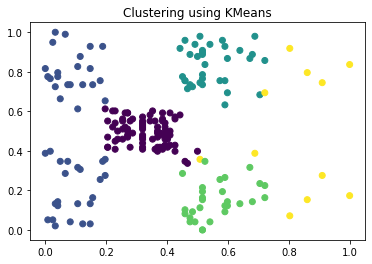

In [ ]:
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'],c=X1['cluster_kn']) # passing the predicted clusters as color
plt.title('Clustering using KMeans')

## MODEL 2: Hierarchical_Clustering

In [ ]:
#### We need to choose the number of clusters and for doing this, so we’ll Plot Dendogram

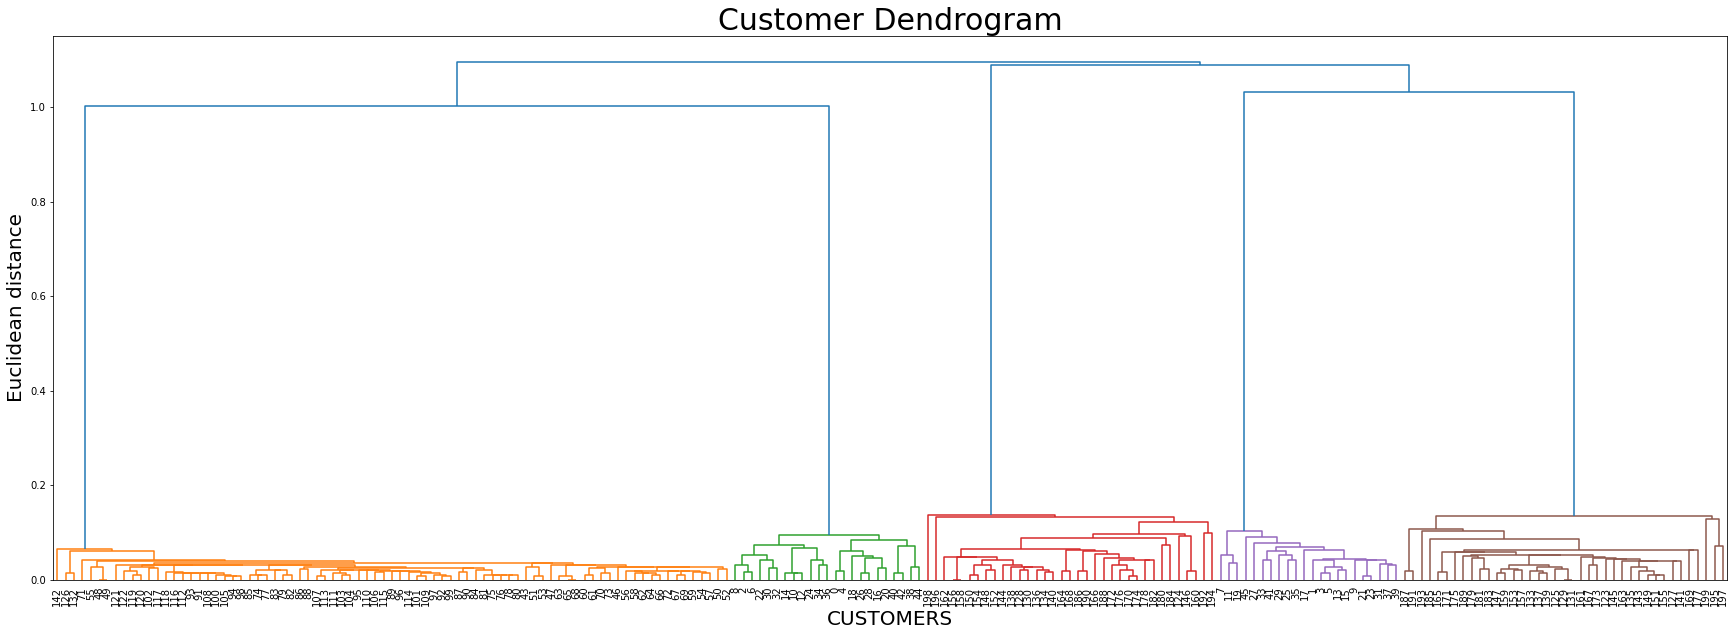

In [ ]:
# using linkage = Single 
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'single'),labels=X.index)
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Customer Dendrogram',fontsize=30)
plt.xlabel('CUSTOMERS',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

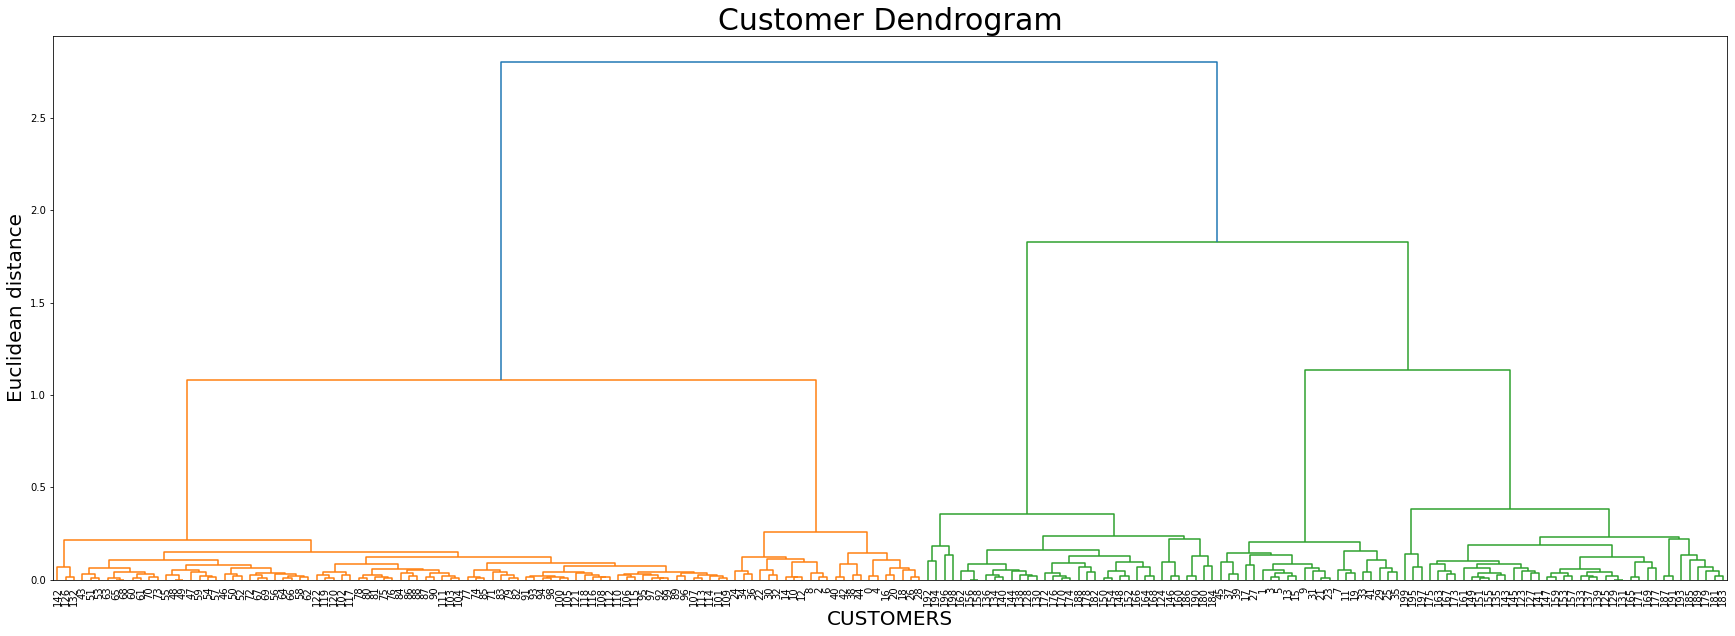

In [ ]:
# using linkage = Average 
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'average'),labels=X.index)
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Customer Dendrogram',fontsize=30)
plt.xlabel('CUSTOMERS',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

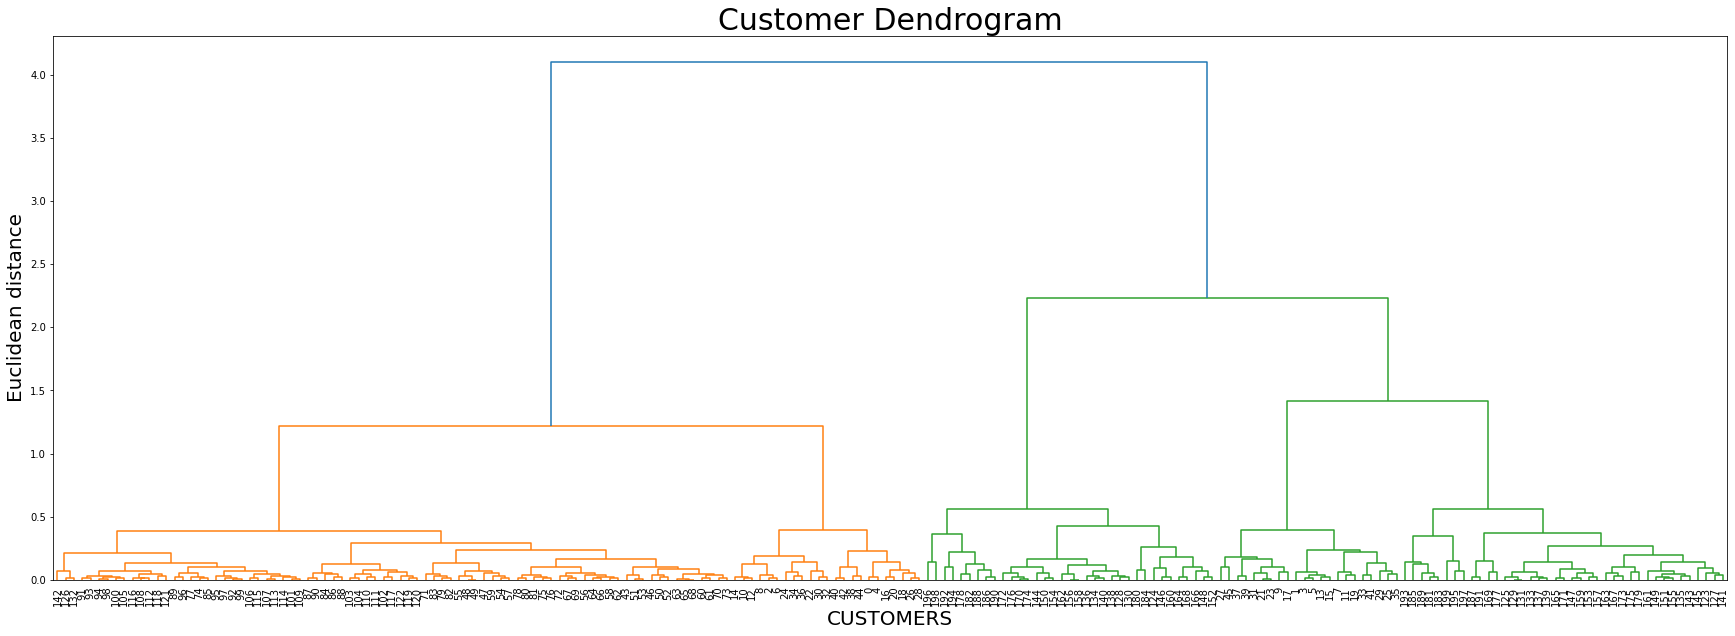

In [ ]:

# using linkage = complete 
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'complete'),labels=X.index)
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Customer Dendrogram',fontsize=30)
plt.xlabel('CUSTOMERS',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

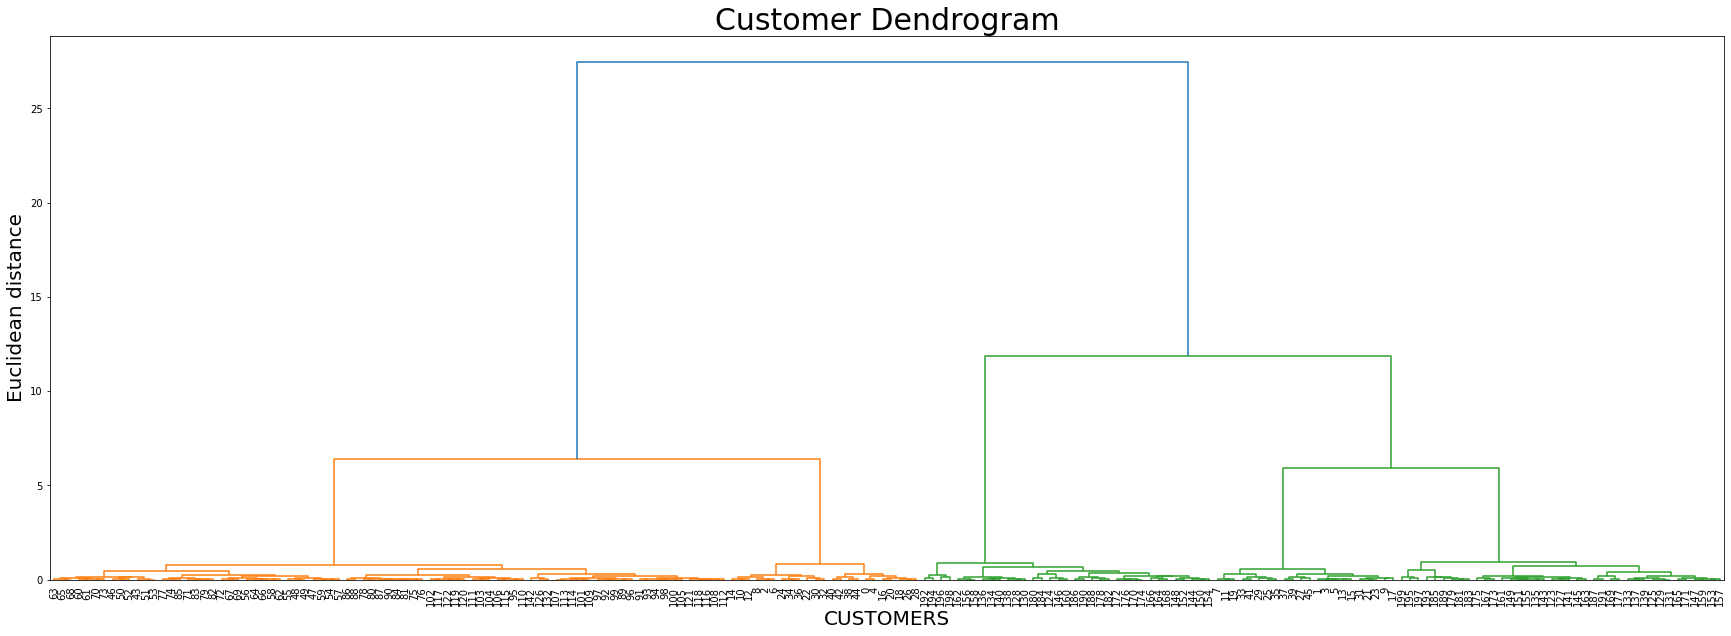

In [ ]:
# using linkage = ward 

plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'),labels=X.index)
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Customer Dendrogram',fontsize=30)
plt.xlabel('CUSTOMERS',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

The x-axis contains the samples and y-axis represents the distance between these samples. 
The vertical line with the maximum distance is the blue line and hence we can decide a threshold of 10 and cut the dendrogram.

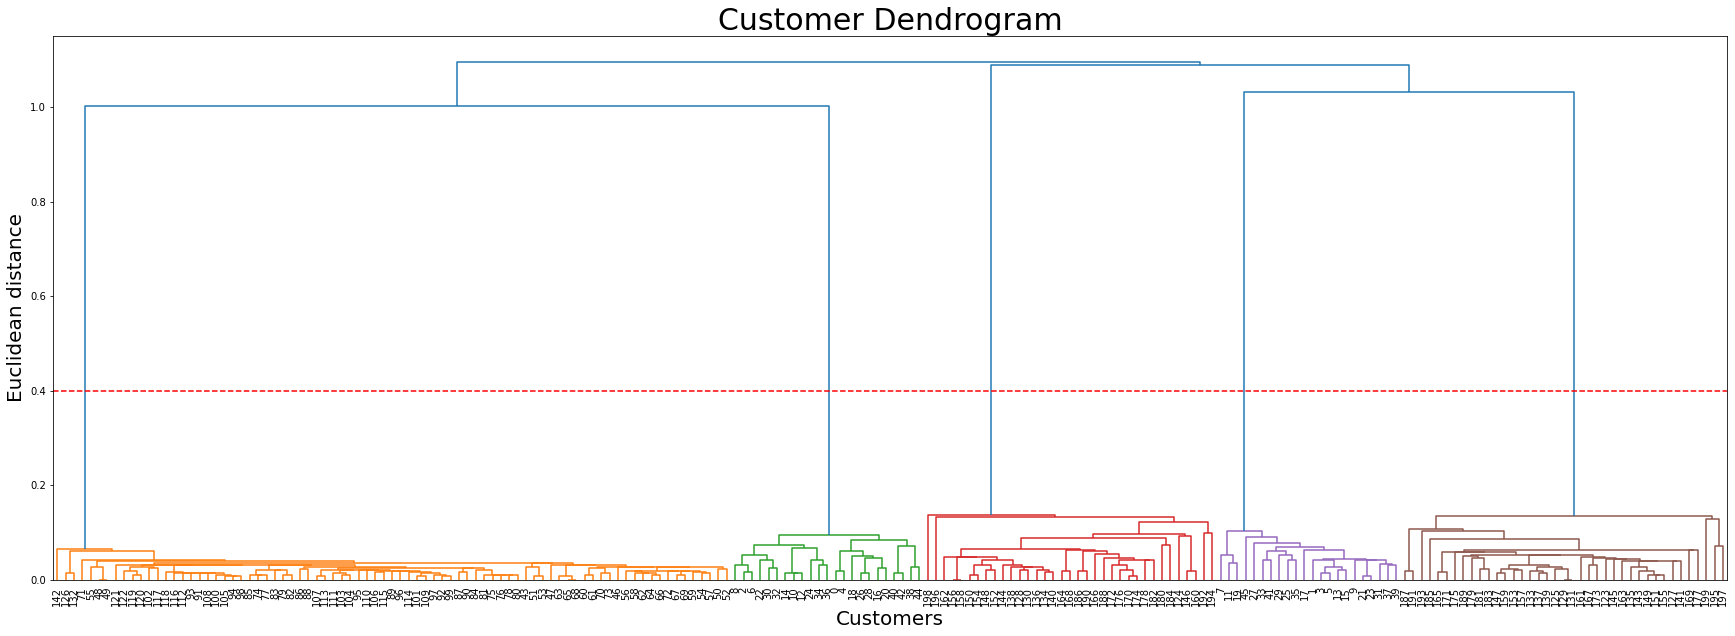

In [ ]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'single'),labels=X.index)
plt.axhline(y=0.4, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Customer Dendrogram',fontsize=30)
plt.xlabel('Customers',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

So, from single linkage method, we found the optimal number of clusters is equal to 5. So let's fit the Agglomerative model with 5 clusters.

In [ ]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'single')
y_hc = hc.fit_predict(X)

In [ ]:
# Predicted values

y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [ ]:

X['Cluster_hierarchical']=y_hc

In [ ]:
# dataframe with adding cluster column

X 

,Annual Income (k$),Spending Score (1-100),cluster_kn,Cluster_hierarchical
0,0.000000,0.387755,3,4
1,0.000000,0.816327,1,3
2,0.008197,0.051020,3,4
3,0.008197,0.775510,1,3
4,0.016393,0.397959,3,4
...,...,...,...,...
195,0.860656,0.795918,2,1
196,0.909836,0.275510,0,0
197,0.909836,0.744898,2,1
198,1.000000,0.173469,0,0


Text(0.5, 1.0, 'Clustering using Cluster_hierarchical')

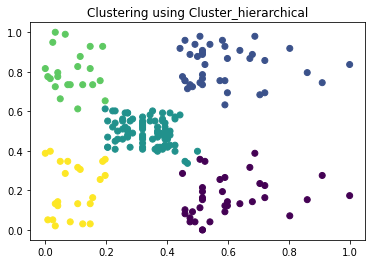

In [ ]:
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'],c=X1['Cluster_hierarchical']) # passing the predicted clusters as color
plt.title('Clustering using Cluster_hierarchical')

MODEL 3: Applying default DBSCAN algorithm to cluster the data

In [ ]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(X)

DBSCAN()

In [ ]:
X['DBSCAN_labels']=dbscan.labels_ 
X

,Annual Income (k$),Spending Score (1-100),cluster_kn,Cluster_hierarchical,DBSCAN_labels
0,0.000000,0.387755,3,4,0
1,0.000000,0.816327,1,3,1
2,0.008197,0.051020,3,4,0
3,0.008197,0.775510,1,3,1
4,0.016393,0.397959,3,4,0
...,...,...,...,...,...
195,0.860656,0.795918,2,1,3
196,0.909836,0.275510,0,0,4
197,0.909836,0.744898,2,1,3
198,1.000000,0.173469,0,0,4


In [ ]:
#Evaluate the optimum values of Hyperparameters

from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

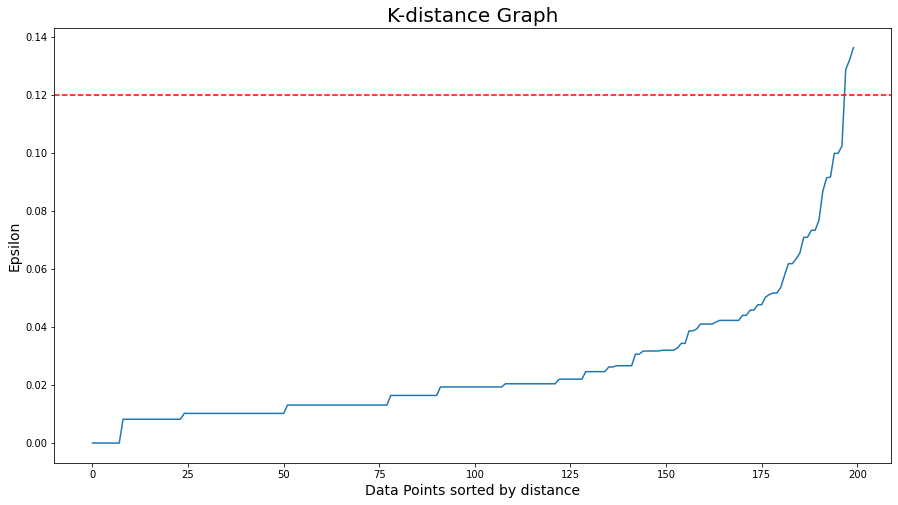

In [ ]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=0.12, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [ ]:
eps=0.12
for min_samples in range(8,15):
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(X)

    x= cluster_labels +2
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', results)

eps= 0.12 | min_samples=  8 | obtained clustering:  [(1, 14), (2, 19), (3, 12), (4, 11), (5, 81), (6, 34), (7, 29)]
eps= 0.12 | min_samples=  9 | obtained clustering:  [(1, 16), (2, 19), (3, 12), (4, 9), (5, 81), (6, 34), (7, 29)]
eps= 0.12 | min_samples=  10 | obtained clustering:  [(1, 29), (2, 18), (3, 12), (4, 81), (5, 31), (6, 29)]
eps= 0.12 | min_samples=  11 | obtained clustering:  [(1, 35), (2, 18), (3, 11), (4, 81), (5, 31), (6, 24)]
eps= 0.12 | min_samples=  12 | obtained clustering:  [(1, 46), (2, 18), (3, 81), (4, 31), (5, 24)]
eps= 0.12 | min_samples=  13 | obtained clustering:  [(1, 47), (2, 17), (3, 81), (4, 31), (5, 24)]
eps= 0.12 | min_samples=  14 | obtained clustering:  [(1, 48), (2, 16), (3, 81), (4, 24), (5, 31)]


In [ ]:
# Applying DBSCAN algorithm with Hyperparameters to cluster the data

In [ ]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=0.12,min_samples=9)
dbscan_opt.fit(X)

DBSCAN(eps=0.12, min_samples=9)

In [ ]:
X1['DBSCAN_opt_labels']=dbscan_opt.labels_
X1['DBSCAN_opt_labels'].value_counts()

 3    81
 4    34
 5    29
 0    19
-1    16
 1    12
 2     9
Name: DBSCAN_opt_labels, dtype: int64

Silhouette Coefficient: 0.872


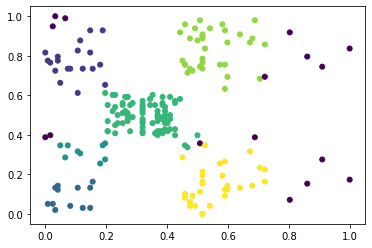

In [ ]:
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=X1['DBSCAN_opt_labels'],s=25)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X1, X1['DBSCAN_opt_labels']))

Conclusion: Kmeans are providing most DISTINCT clusters. Hierarchical clustering is also providing DISTINCT clusters but poor than KMeans. And DBSCAN is providing overlapping clusters.